# Stack

## Build via Axes

A histogram stack holds multiple 1-D histograms into a stack, whose axes are required to match.

In [1]:
from hist import Hist, Stack, axis, NamedHist, BaseHist
import numpy as np
import matplotlib.pyplot as plt

ax = axis.Regular(50, -5, 5, underflow=False, overflow=False, name="X")

h1 = Hist(ax).fill(2 * np.random.normal(size=500) + 2 * np.ones((500,)))

h2 = Hist(ax).fill(2 * np.random.normal(size=500) - 2 * np.ones((500,)))

h3 = Hist(ax).fill(np.random.normal(size=600))

s = Stack(h1, h2, h3)

HistStack has `.plot()` method which calls mplhep and plots the histograms in the stack:

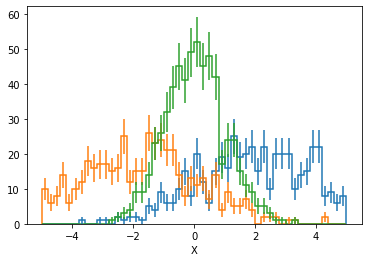

In [2]:
s.plot()
plt.show()

We can use `.show()` to access `histoprint` and print the stacked histograms to the console.

In [3]:
s.show(columns=50)

-5.00e+00 _                             8.30e+01 ╷
-4.80e+00 _││││
-4.60e+00 _││
-4.40e+00 _│││
-4.20e+00 _││││││
-4.00e+00 _││
-3.80e+00 _││││
-3.60e+00 _│││││
-3.40e+00 _││││││││
-3.20e+00 _│││││││
-3.00e+00 _│││││││
-2.80e+00 _│││││││
-2.60e+00 _│││││││
-2.40e+00 _│││││││
-2.20e+00 _│││││││││││═
-2.00e+00 _│││││═
-1.80e+00 _│││││││════
-1.60e+00 _│││││││════
-1.40e+00 _██││││││││││││══════
-1.20e+00 _█││││││││││══════════
-1.00e+00 _████│││││││││││════════════
-8.00e-01 _██│││││││││═══════════════
-6.00e-01 _██│││││││││══════════════════
-4.00e-01 _████││││││═════════════════════
-2.00e-01 _███████│││═══════════════════
 0.00e+00 _███││││││═══════════════════════
 2.00e-01 _█████████│││││════════════════════════
 4.00e-01 _█████││││││═════════════════════
 6.00e-01 _██│││══════════════════════
 8.00e-01 _███████││││││═══════════════════
 1.00e+00 _████████│═══════
 1.20e+00 _███████││││═══════════
 1.40e+00 _███████████││═══════════
 1.60e+00 _████████││═══════
 1.80e+00 _█████████│

## Build via A Category Axis

You can also build a histogram stack from a 2-D histogram's Category axis (`IntCat`, `StrCat`), for example,

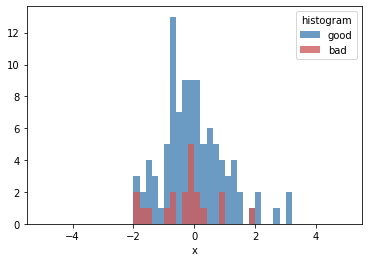

In [4]:
h = (
    Hist.new.Reg(50, -5, 5, name="x")
    .StrCat(["good", "bad"], name="quality")
    .Double()
    .fill(x=np.random.randn(100), quality=["good", "good", "good", "good", "bad"] * 20)
)

# Turn an existin axis into a stack
s = h.stack("quality")
s[::-1].plot(stack=True, histtype="fill", color=["indianred", "steelblue"], alpha=0.8)
plt.show()

The histograms in this kind of stack can have names. The names of histograms are the categories, which are corresponding profiled histograms:

In [5]:
print(s[0].name)
s[0]

good


Hist(Regular(50, -5, 5, name='x', label='x'), storage=Double()) # Sum: 80.0

In [6]:
print(s[1].name)
s[1]

bad


Hist(Regular(50, -5, 5, name='x', label='x'), storage=Double()) # Sum: 20.0